<a href="https://colab.research.google.com/github/badhan05/Data-Mining/blob/main/Discovery_frequent_items.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from collections import Counter
from typing import List, Set, Dict, FrozenSet
from itertools import combinations

class AprioriAlgorithm:
    def __init__(self, file: str):
        self.baskets = self.read_dataset(file)

    def read_dataset(self, file: str) -> List[Set[int]]:
        with open(file, "r") as f:
            return [{int(item_id) for item_id in line.split()} for line in f.read().splitlines()]

    def find_frequent_singletons(self, s=1) -> Dict[FrozenSet[int], int]:
        item_to_support = Counter(item for basket in self.baskets for item in basket)
        return {frozenset([item]): support for item, support in item_to_support.items() if support > s}

    def generate_candidate_itemsets(self, precedent_item_sets: List[FrozenSet[int]], item_set_length: int) -> Set[FrozenSet[int]]:
        return {item_set_left | item_set_right
                for item_set_left in precedent_item_sets
                for item_set_right in precedent_item_sets
                if len(item_set_left | item_set_right) == item_set_length}

    def filter_frequent_itemsets(self, candidate_item_sets: Set[FrozenSet[int]], item_set_length: int, s: int = 1) -> Dict[FrozenSet[int], int]:
        item_set_to_support = Counter(frozenset(item_set)
                                      for basket in self.baskets
                                      for item_set in combinations(basket, item_set_length)
                                      if frozenset(item_set) in candidate_item_sets)
        return {item_set: support for item_set, support in item_set_to_support.items() if support > s}



In [43]:
from typing import List, Set, Dict, FrozenSet, Tuple
from itertools import combinations
from tqdm import tqdm

class AssociationRules:

    def __init__(self, transactions: List[Set[int]], frequent_itemsets: Dict[FrozenSet[int], int], min_support: int, min_confidence: float):
        self.transactions = transactions
        self.frequent_itemsets = frequent_itemsets
        self.min_support = min_support
        self.min_confidence = min_confidence

    def calculate_support(self, itemset: FrozenSet[int]) -> float:
        return sum(1 for transaction in self.transactions if itemset.issubset(transaction))

    def generate_rules(self) -> List[Tuple[FrozenSet[int], FrozenSet[int], float, float]]:
        ass_rules = []

        for itemset in tqdm(self.frequent_itemsets):
            for i in range(1, len(itemset)):
                for antecedent in combinations(itemset, i):
                    antecedent = frozenset(antecedent)
                    consequent = itemset - antecedent

                    rule_support = self.calculate_support(itemset)
                    # if antecedent in self.frequent_itemsets:
                    antecedent_support = self.calculate_support(antecedent)
                    confidence = rule_support / antecedent_support if antecedent_support > 0 else 0
                    if rule_support >= self.min_support and confidence >= self.min_confidence:
                            ass_rules.append((antecedent, consequent, rule_support, confidence))

        return ass_rules

100%|██████████| 339/339 [00:24<00:00, 13.57it/s]


Rules with itemsets of length 2: 8
Rule: 626 -> 496, Support: 761, Confidence: 0.8707093821510298
Rule: 801 -> 862, Support: 674, Confidence: 0.807185628742515
Rule: 842 -> 803, Support: 607, Confidence: 0.8071808510638298
Rule: 842 -> 411, Support: 603, Confidence: 0.8018617021276596
Rule: 969 -> 290, Support: 797, Confidence: 0.9387514723203769
Rule: 969 -> 458, Support: 788, Confidence: 0.928150765606596
Rule: 969 -> 208, Support: 806, Confidence: 0.9493521790341578
Rule: 969 -> 888, Support: 810, Confidence: 0.9540636042402827


100%|██████████| 109/109 [00:23<00:00,  4.59it/s]


Rules with itemsets of length 3: 276
Rule: 704, 825 -> 39, Support: 1035, Confidence: 0.9392014519056261
Rule: 39, 704 -> 825, Support: 1035, Confidence: 0.9349593495934959
Rule: 39, 825 -> 704, Support: 1035, Confidence: 0.8719460825610783
Rule: 795, 853 -> 623, Support: 720, Confidence: 0.8933002481389578
Rule: 623, 795 -> 853, Support: 720, Confidence: 0.8944099378881988
Rule: 623, 853 -> 795, Support: 720, Confidence: 0.9102402022756005
Rule: 571, 795 -> 623, Support: 704, Confidence: 0.8400954653937948
Rule: 571, 623 -> 795, Support: 704, Confidence: 0.8991060025542784
Rule: 623, 795 -> 571, Support: 704, Confidence: 0.8745341614906832
Rule: 571, 795 -> 853, Support: 715, Confidence: 0.8532219570405728


100%|██████████| 42/42 [00:21<00:00,  1.97it/s]


Rules with itemsets of length 4: 203
Rule: 571, 853 -> 623, 795, Support: 655, Confidence: 0.8259773013871374
Rule: 571, 623 -> 795, 853, Support: 655, Confidence: 0.8365261813537676
Rule: 795, 853 -> 571, 623, Support: 655, Confidence: 0.8126550868486352
Rule: 623, 795 -> 571, 853, Support: 655, Confidence: 0.8136645962732919
Rule: 623, 853 -> 571, 795, Support: 655, Confidence: 0.8280657395701644
Rule: 571, 795, 853 -> 623, Support: 655, Confidence: 0.916083916083916
Rule: 571, 623, 795 -> 853, Support: 655, Confidence: 0.9303977272727273
Rule: 571, 623, 853 -> 795, Support: 655, Confidence: 0.9186535764375876
Rule: 623, 795, 853 -> 571, Support: 655, Confidence: 0.9097222222222222
Rule: 969 -> 208, 290, 458, Support: 719, Confidence: 0.8468786808009423


100%|██████████| 9/9 [00:09<00:00,  1.09s/it]


Rules with itemsets of length 5: 72
Rule: 969 -> 208, 290, 458, 888, Support: 693, Confidence: 0.8162544169611308
Rule: 290, 969 -> 208, 458, 888, Support: 693, Confidence: 0.8695106649937264
Rule: 290, 458 -> 208, 888, 969, Support: 693, Confidence: 0.8816793893129771
Rule: 208, 290 -> 458, 888, 969, Support: 693, Confidence: 0.863013698630137
Rule: 290, 888 -> 208, 458, 969, Support: 693, Confidence: 0.8389830508474576
Rule: 458, 969 -> 208, 290, 888, Support: 693, Confidence: 0.8794416243654822
Rule: 208, 969 -> 290, 458, 888, Support: 693, Confidence: 0.8598014888337469
Rule: 888, 969 -> 208, 290, 458, Support: 693, Confidence: 0.8555555555555555
Rule: 208, 458 -> 290, 888, 969, Support: 693, Confidence: 0.8706030150753769
Rule: 458, 888 -> 208, 290, 969, Support: 693, Confidence: 0.8706030150753769


0it [00:00, ?it/s]


Rules with itemsets of length 6: 0


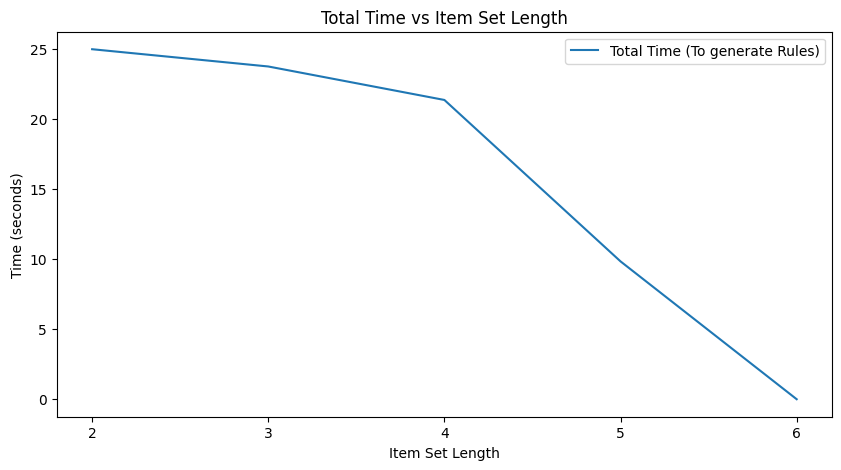

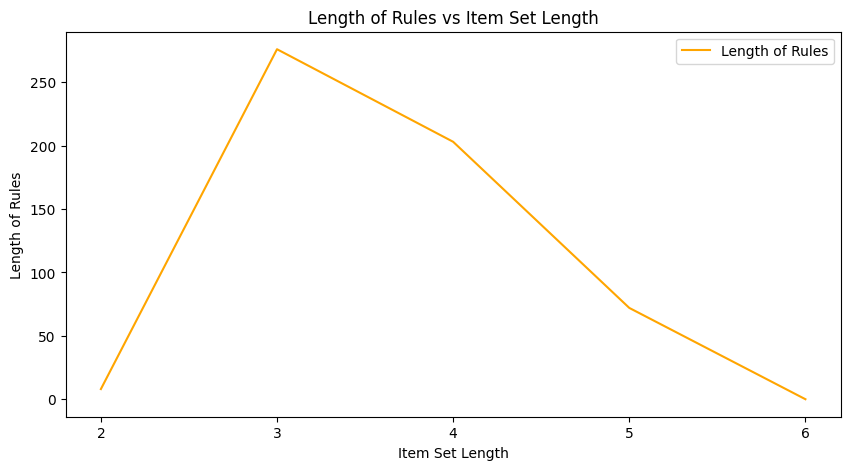

In [44]:
import os
import time
import matplotlib.pyplot as plt

# from apriori import apriori_algo
# from association import AssociationRules


def format_itemset(itemset):
    return ", ".join(map(str, sorted(itemset)))


def main_itemsets():
    path = os.path.dirname(os.getcwd())
    data_path = os.path.join("T10I4D100K.dat")
    apiroi = AprioriAlgorithm(data_path)
    min_support = 100

    # Initialize lists to store times and lengths
    total_times = []  # Sum of candidate_times and frequent_times
    frequent_lengths = []  # Length of frequent items
    lengths = []

    frequent_singletons = apiroi.find_frequent_singletons(s=min_support)
    print(f"Frequent Singletons: {len(frequent_singletons)}")
    print(
        {
            format_itemset(k): frequent_singletons[k]
            for k in list(frequent_singletons)[:10]
        }
    )

    i = 2
    while frequent_singletons:
        start_time_candidate = time.time()
        candidate_item_sets = apiroi.generate_candidate_itemsets(
            frequent_singletons.keys(), i
        )
        candidate_time = time.time() - start_time_candidate

        start_time_frequent = time.time()
        filtered_frequent_item_sets = apiroi.filter_frequent_itemsets(
            candidate_item_sets, i, s=min_support
        )
        frequent_time = time.time() - start_time_frequent

        # Append sum of times and length
        total_times.append(candidate_time + frequent_time)
        frequent_lengths.append(len(filtered_frequent_item_sets))
        lengths.append(i)

        print(f"Candidate ItemSets of length {i}: {len(candidate_item_sets)}")
        print(f"Frequent ItemSets of length {i}: {len(filtered_frequent_item_sets)}")

        i += 1
        frequent_singletons = filtered_frequent_item_sets

    # Plotting Total Time
    plt.figure(figsize=(10, 5))
    plt.plot(
        lengths,
        total_times,
        label="Total Time (To generate Candidate + Frequent Item Sets)",
    )
    plt.xlabel("Item Set Length")
    plt.ylabel("Time (seconds)")
    plt.title("Total Time vs Item Set Length")
    plt.xticks(lengths)
    plt.legend()
    plt.show()

    # Plotting Length of Frequent Items
    plt.figure(figsize=(10, 5))
    plt.plot(
        lengths, frequent_lengths, label="Length of Frequent Items", color="orange"
    )
    plt.xlabel("Item Set Length")
    plt.ylabel("Length of Frequent Items")
    plt.title("Length of Frequent Items vs Item Set Length")
    plt.xticks(lengths)
    plt.legend()
    plt.show()


def main_rules():
    path = os.path.dirname(os.getcwd())
    data_path = os.path.join("T10I4D100K.dat")
    apiroi = AprioriAlgorithm(data_path)
    min_support = 500
    transactions = apiroi.read_dataset(data_path)

    total_times = []  # Sum of candidate_times and frequent_times
    rules_lengths = []  # Length of frequent items
    lengths = []

    frequent_singletons = apiroi.find_frequent_singletons(s=min_support)

    i = 2
    while frequent_singletons:
        candidate_item_sets = apiroi.generate_candidate_itemsets(
            frequent_singletons.keys(), i
        )

        filtered_frequent_item_sets = apiroi.filter_frequent_itemsets(
            candidate_item_sets, i, s=min_support
        )

        rules_generator = AssociationRules(
        transactions, filtered_frequent_item_sets, min_support=550, min_confidence=0.8
        )
        start_time = time.time()
        rules = rules_generator.generate_rules()
        total_time = time.time() - start_time

        # Append sum of times and length
        total_times.append(total_time)
        rules_lengths.append(len(rules))
        lengths.append(i)

        print(f"Rules with itemsets of length {i}: {len(rules)}")
        for rule in rules[:10]:
            antecedent, consequent, support, confidence = rule
            formatted_antecedent = format_itemset(antecedent)
            formatted_consequent = format_itemset(consequent)
            print(
                f"Rule: {formatted_antecedent} -> {formatted_consequent}, Support: {support}, Confidence: {confidence}"
            )

        i += 1
        frequent_singletons = filtered_frequent_item_sets

    # Plotting Total Time
    plt.figure(figsize=(10, 5))
    plt.plot(lengths, total_times, label="Total Time (To generate Rules)")
    plt.xlabel("Item Set Length")
    plt.ylabel("Time (seconds)")
    plt.title("Total Time vs Item Set Length")
    plt.xticks(lengths)
    plt.legend()
    plt.show()

    # Plotting Length of Rules
    plt.figure(figsize=(10, 5))
    plt.plot(lengths, rules_lengths, label="Length of Rules", color="orange")
    plt.xlabel("Item Set Length")
    plt.ylabel("Length of Rules")
    plt.title("Length of Rules vs Item Set Length")
    plt.xticks(lengths)
    plt.legend()
    plt.show()


if __name__ == "__main__":
    # main_itemsets()
    main_rules()